#### Kontrol Automatikoa.Maiatzeko deialdia

##### 1. problema

Diseinatu behar da PD kontrolagailu bat Erroen Kokaeraren teknika erabiliz, sistemaren planta eta berrelikadura transferentzia funtzioa hauek izanik: 

$G(s)=\frac{100(s+4)}{(s^{2}+s+1.25)}\quad\text{eta}\quad H(s)=\frac{1}{s+10}$

hurrengo espezifikazioak lortzeko: 

(a) Irteera-seinalearen gaindiketa azkenengo balioaren $\%18$ edo txikiagoa izango da.

(b) Puntako denbora $T_{1}\leq1.2$ s.

Hau da eskatzen dena:

    (a) PD kontrolagailua diseinatu. 

    (b) Aztertu lortutako espezifikazioak eta lortzen ez badira azaldu zergatia.

    (c) Aztertu sistemaren egonkorreko prezisioa begizta itxian: errore-seinalea, sistemaren errorea. Baloratu diferentziak bi erroreen artean eta proposatu soluzio bat biak hobetzeko.

#### Ebazpena

Lehengo sartu datuak

In [27]:
s=%s;
g=100*(s + 4)/(s^2 + s + 1.25);g.dt='c'
// h deitzen dut h1 arazo numerikoak ekiditzeko -- jupyter arazo bat izenarekin--
h1=1/(s+10)

R=18/100
d=1/sqrt((%pi/log(R))^2+1)
T1=1.2

 g  = 
    400 +100s    
   ------------  
   1.25 +s +s^2  
 h1  = 
     1    
   -----  
   10 +s  
 R  = 
   0.18
 d  = 
   0.4791110
 T1  = 
   1.2


Lehengo pasu bezala espezifikazioen zonaldea zehazten dira, eta plantaren EK ere marrazten da.

Gogoratu EK begizta irekiko transferentzia funtziorekin egiten dela: $H(s)G(s)$

Puntu bat aukeratuta, puntu hori ere marrazten da. Adibidez $s_d= -2+3 j$


 wd  = 
   2.6179939
 re  = 
   0.   30.
 s2  = 
   0. + 2.6179939i  -30. + 2.6179939i
 sd  = 
  -2. + 3.i


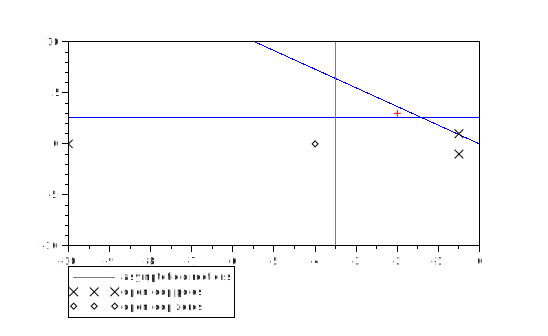

In [30]:
// d kte
wn=[0,30];
s1=(-d+sqrt(d^2-1))*wn;
// T1 kte
wd=%pi/T1
re=[0,30]
s2=-re+wd*%i
scf(1);clf()
plot(real(s1),imag(s1))
plot(real(s2),imag(s2))
evans(g*h1)
sd=-2+3*%i
plot(real(sd),imag(sd),'+r')
replot([-10,-10,0,10])

Orain fase baldintza erabiltzen da kontrolagailua diseinatzeko

$PD(s)=K_p(1+T_d s$)

Oharra: Baita ere polo bat sartu daiteke, PD kausal bat lortzeko.
 

In [31]:
[db,phi]=dbphi(horner(g*h1,sd));
pha=(180-phi)*%pi/180;

Td=1/(imag(sd)/tan(pha)-real(sd))
[db,phi]=dbphi(horner((1+Td*s)*g*h1,sd));
// Konprobazioa
disp('Fase',phi)

 Td  = 
   0.1047188

  "Fase"

   180.


Orain Modulu baldintza eta . Gogoratu $H(s)$ berrelikaduran dagoela

In [33]:
Kp=1/abs(horner((1+Td*s)*g*h1,sd))

pd=Kp*(1+Td*s);
gitxia=(pd*g)/.(h1);
disp(roots(gitxia.den))

 Kp  = 
   0.2975

  -10.115385 + 0.i
  -2.        + 3.i
  -2.        - 3.i


Polo desiratuak daude. Orain espezifikazioak aztertzen dira

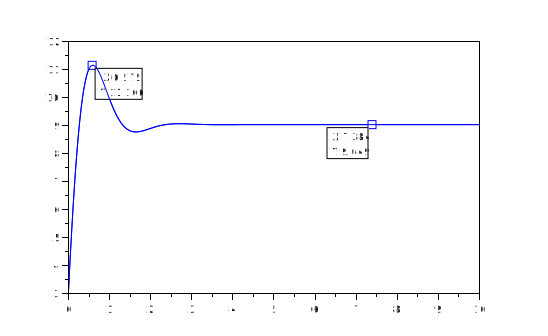

In [16]:
%plot inline
t=[0:0.01:10];
y=csim('step',t,gitxia);
scf(1);
plot(t,y)

Kalkulatu daiteke gaindiketa $R=\% 23$.

Baita ere ikusten da irabazioa ez dela egokia: berrelikaduran dagoen ireabazia ez da 1.

c) Atlean galdetzen dute erroreari buruz, errore-seianlea eta sitemaren errorea ez dira berdinak, $H(0)\neq 0$ delako.

Aurrekonpentsazio bat erabili daiteke hori ekiditzeko.

 h0  = 
   0.1
 gitxia  = 
   119 +54.111538s +7.3365385s^2 +0.3115385s^3  
   -------------------------------------------  
      131.5 +53.461538s +14.115385s^2 +s^3      


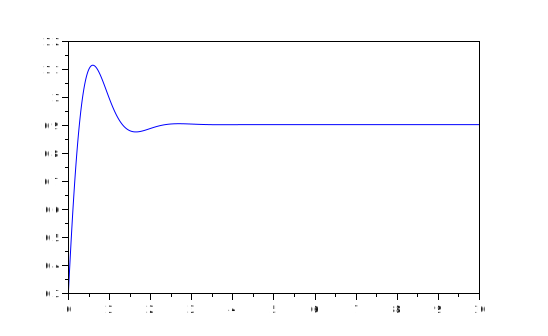

In [34]:
h0=horner(h1,0)
gitxia=h0*((Kp*(1+Td*s)*g)/.(h1))
y=csim('step',t,gitxia);
scf(1);
plot(t,y)

Konpentsatura irabazioa eta errorea egokia da. Gaindiketa ez da aldatu noski.

Zergatik ez da espezifikazio hori bete? Plantak $-4$ puntuan zero "nagusi" bat duelako, sistema oszilakorrago eta azkarragoa egiten.

Konpontzeko gaindiketa EKn begiratu dezakegu, ea irakazia aldatuta zer gertatzen den.

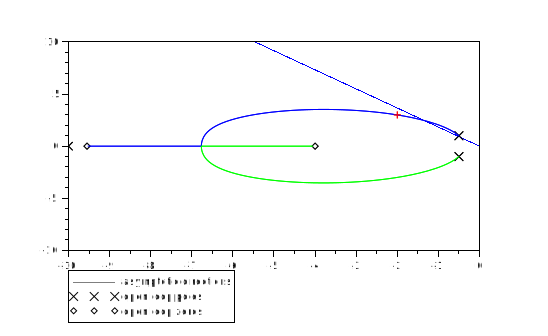

In [43]:
%plot inline
plot(real(s1),imag(s1))
evans(pd*h1*g)
plot(real(sd),imag(sd),'+r')
replot([-10,-10,0,10])

Ikusten da $K$ jaitsiz $\delta$ kaltetzen da, baina zeroa ez da hain nagusia.

$K$ igoz, aldrebes gertatzen da. Kontraesankorrak direnez joera biak, simulazio bi egiten dira.

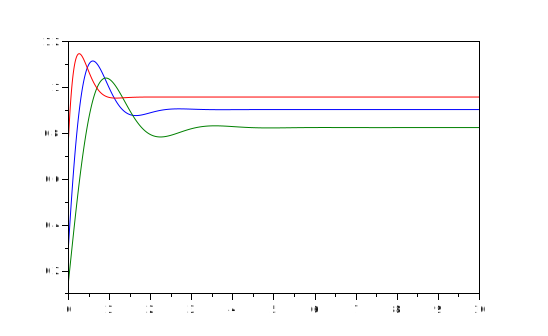

In [45]:
gitxia1=h0*((0.5*pd*g)/.(h1));
gitxia2=h0*((2.5*pd*g)/.(h1));
y1=csim('step',t,gitxia1);
y2=csim('step',t,gitxia2);
scf(1);
plot(t,y,t,y1,t,y2)

Ikusten da  $K$ jaitsiz zeroak irabazten duela eta aldrebez, beraz, soluzio hobea da $K=2.5$.

Halere, beste aukera da hasierako espezifikazioa aldatu, $\delta$ txikiagoa aukeratuz. Adibidez, $s_d=-2+2 j$. 

Errepikatzen da diseinua (scriptean balioa aldatu)


  "Fase"

   180.00000

  "Poloak begizta itxian"

  -13.9375 + 0.i
  -2.      + 2.i
  -2.      - 2.i


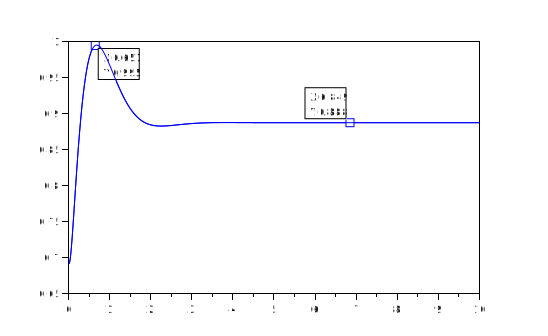

In [49]:
%plot inline
sd=-2+2*%i;
[db,phi]=dbphi(horner(g*h1,sd));
pha=(180-phi)*%pi/180;

Td=1/(imag(sd)/tan(pha)-real(sd));
[db,phi]=dbphi(horner((1+Td*s)*g*h1,sd));
// Konprobazioa
disp('Fase',phi)
Kp=1/abs(horner((1+Td*s)*g*h1,sd));

pd=Kp*(1+Td*s);
gitxia=(pd*g)/.(h1);
disp('Poloak begizta itxian',roots(gitxia.den))

gitxia=h0*((pd*g)/.(h1));
y=csim('step',t,gitxia);
scf(1);
plot(t,y)


Orain gaindiketa ondo dago $R=\% 12$ (eta puntako denbora)

Amaitzeko, kontrol seinalea kalkulatzen dugu. Horretarako PD kausal bat definitu behar da

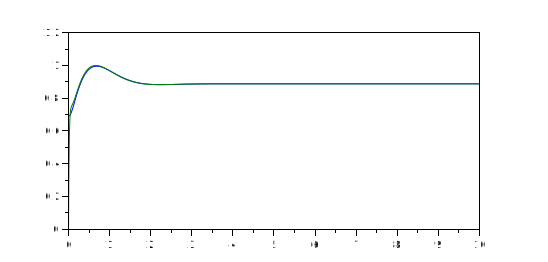

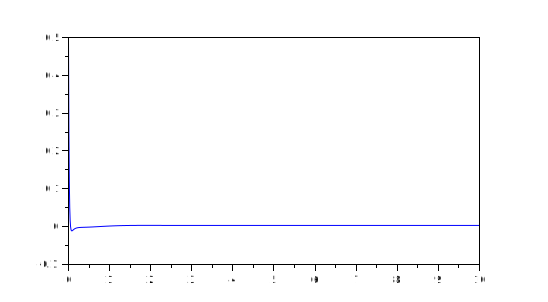

In [53]:
pd1=Kp*(1+Td*s)/(1+Td*0.05*s);
gitxia1=h0*((pd1*g)/.(h1));
uitxia1=h0*((pd1)/.(g*h1));

y1=csim('step',t,gitxia1);
u1=csim('step',t,uitxia1);
scf(1);
plot(t,y,t,y1)

scf(2);
plot(t,u1)


Kontrol seinalea txikia da erlatiboki (jakin gabe zentzu fisikoa,noski, orokorrean hartuta). 

Agian arazoak, egon daitezke zona hila baldin badago.

Ikusi dugunez hasierako diseinuan $K$ igoz gaindiketa konpondu zitekeela, posible da hortik jo, kontrol seinalea ere handituz. Ariketa bezala uzten da.